In [1]:
import copy
import warnings

import numpy as np
import xarray as xr

import sys, pdb, traceback

import matplotlib.pyplot as plt

import rotunno as rt
import qian_helpers
import rotunno_helpers

In [2]:
# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport rotunno 
%aimport qian_helpers
%aimport rotunno_helpers

In [3]:
ds_qian = rt.solve_qian(xiN=41, zetaN=21, tauN=16, sN=1000, U=0.1, L=0.2, alpha=3, save=False)
# ds_rotunno = rt.solve_rotunno_case_two(xiN=81, zetaN=41, tauN=16, kN=1000, 
#                                        xi0=0.2, beta=0.007195175718401071)

Initialising
Integrating
100%|██████████| 20/20 [00:48<00:00,  2.41s/it]
Saving


In [5]:
ds_qian.bq.max()

<xarray.DataArray 'bq' ()>
array(3.546699)

In [14]:
try:
    print(x)
except:
    warnings.warn('errer')

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: errer
  after removing the cwd from sys.path.


0.022070963197811315

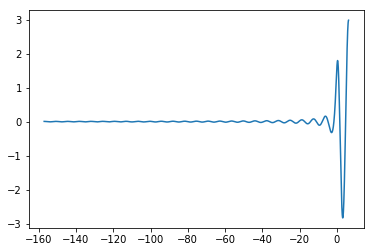

In [79]:
x1=np.arange(-50*np.pi,-10*np.pi,np.pi/32)
x2=np.linspace(-10*np.pi,2*np.pi,10**3)
x = np.concatenate((x1,x2))
y = (np.pi/2+np.arctan(x))*np.cos(x)
plt.plot(x,y)
np.trapz(y,x)

In [4]:
omega = 2*np.pi/(24*3600)
# ds_rotunno_dim = rt.redimensionalise_rotunno(copy.deepcopy(ds_rotunno), h=5000, f=0, N=0.035)
ds_qian_dim = rt.redimensionalise_qian(copy.deepcopy(ds_qian), h=1500, N=0.035, Q0=10**3*omega**3*1500*np.pi)

In [5]:
# rt.animatePsi(ds_dim.sum(dim='mode', keep_attrs=True).squeeze())
# rt.animatePsi(ds_dim.sel(mode=2).squeeze())
rt.animateCont(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze(),  var='bq')

Plotting stream function.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15


In [277]:
ds = xr.open_dataset('/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/datasets/qian_20191121_081203.nc')

In [11]:
# rt.animateVelocity(ds.sum(dim='mode', keep_attrs=True).squeeze())
rt.animateVelocity(ds_rotunno_dim)
rt.animateVelocity(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze())

Plotting velocity.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15
Timestep 16
Timestep 17
Timestep 18
Timestep 19
Timestep 20
Timestep 21
Timestep 22
Timestep 23
Timestep 24
Timestep 25
Timestep 26
Timestep 27
Timestep 28
Timestep 29
Timestep 30
Timestep 31
Plotting velocity.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15
Timestep 16
Timestep 17
Timestep 18
Timestep 19
Timestep 20
Timestep 21
Timestep 22
Timestep 23
Timestep 24
Timestep 25
Timestep 26
Timestep 27
Timestep 28
Timestep 29
Timestep 30
Timestep 31


In [231]:
0.35*0.035

0.01225

In [232]:
0.35/np.pi

0.11140846016432673

Plotting velocity.


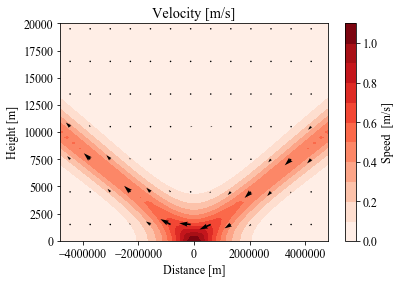

In [9]:
rt.plotVelocity(ds_rotunno_dim, t=0); plt.show()

Plotting velocity.


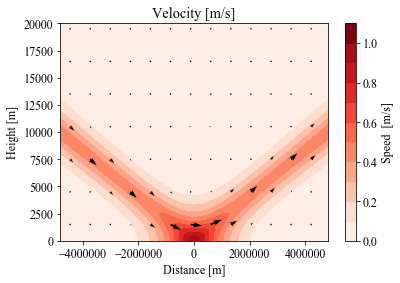

In [10]:
rt.plotVelocity(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze(), t=8); plt.show()

In [20]:
ds_rotunno_dim.tau

<xarray.DataArray 'tau' (tau: 32)>
array([    0.,  2700.,  5400.,  8100., 10800., 13500., 16200., 18900., 21600.,
       24300., 27000., 29700., 32400., 35100., 37800., 40500., 43200., 45900.,
       48600., 51300., 54000., 56700., 59400., 62100., 64800., 67500., 70200.,
       72900., 75600., 78300., 81000., 83700.])
Coordinates:
  * tau      (tau) float64 0.0 2.7e+03 5.4e+03 ... 7.83e+04 8.1e+04 8.37e+04
Attributes:
    units:    s

In [40]:
print(ds.u.min())
print(ds.w.min())
print(ds_dim.u.min())
print(ds_dim.w.min())

<xarray.DataArray 'u' ()>
array(-13.749331)
<xarray.DataArray 'w' ()>
array(-5.635027)
<xarray.DataArray 'u' ()>
array(-1.499819)
<xarray.DataArray 'w' ()>
array(-0.614686)
